# Analise de Dados com Gráficos básica para uma loja de Acai
##Usando ferrametas que constroem graficos

###Importando as Bibliotecas necessarias para essa analise que permitira a geração dos graficos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('vendas.csv.csv')

###Dando uma olhada por alto do nosso dataframe

In [6]:
data.head(5), data.info(5), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_pedido        70000 non-null  object
 1   data             70000 non-null  object
 2   loja             70000 non-null  object
 3   cidade           70000 non-null  object
 4   estado           70000 non-null  object
 5   regiao           70000 non-null  object
 6   tamanho          70000 non-null  object
 7   local_consumo    70000 non-null  object
 8   preco            70000 non-null  int64 
 9   forma_pagamento  70000 non-null  object
 10  ano_mes          70000 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.9+ MB


(  id_pedido                 data    loja          cidade          estado  \
 0   PED1994  2020-01-01 00:00:00  Loja 4          Santos       São Paulo   
 1   PED2246  2020-01-01 00:00:00  Loja 6   Florianópolis  Santa Catarina   
 2   PED3876  2020-01-01 00:00:00  Loja 3  Rio de Janeiro  Rio de Janeiro   
 3   PED4352  2020-01-01 00:00:00  Loja 1       Fortaleza           Ceará   
 4   PED8633  2020-01-01 00:00:00  Loja 5       São Paulo       São Paulo   
 
      regiao tamanho     local_consumo  preco forma_pagamento  ano_mes  
 0   Sudeste   300ml  Consumo no local      5        Dinheiro  2020-01  
 1       Sul   500ml  Consumo no local     11          Débito  2020-01  
 2   Sudeste   300ml          Delivery      7         Crédito  2020-01  
 3  Nordeste  1000ml  Consumo no local      7          Débito  2020-01  
 4   Sudeste   200ml          Delivery      9         Crédito  2020-01  ,
 None,
               preco
 count  70000.000000
 mean       8.355200
 std        2.653061
 min  

###Nesta parte vamos fazer uma limpa para ver se tem valores nulos nas colunas

In [7]:
# 1. Verificar a contagem de valores nulos por coluna
print("Contagem de valores nulos por coluna:")
print(data.isnull().sum())

# 2. Verificar a porcentagem de valores nulos por coluna
print("\nPorcentagem de valores nulos por coluna:")
print((data.isnull().sum() / len(data)) * 100)

# 3. Verificar se há ALGUM valor nulo no DataFrame (retorna True/False)
print("\nExiste algum valor nulo no DataFrame?")
print(data.isnull().any().any())

# 4. Contar o total de valores nulos no DataFrame
print("\nTotal de valores nulos no DataFrame:")
print(data.isnull().sum().sum())

Contagem de valores nulos por coluna:
id_pedido          0
data               0
loja               0
cidade             0
estado             0
regiao             0
tamanho            0
local_consumo      0
preco              0
forma_pagamento    0
ano_mes            0
dtype: int64

Porcentagem de valores nulos por coluna:
id_pedido          0.0
data               0.0
loja               0.0
cidade             0.0
estado             0.0
regiao             0.0
tamanho            0.0
local_consumo      0.0
preco              0.0
forma_pagamento    0.0
ano_mes            0.0
dtype: float64

Existe algum valor nulo no DataFrame?
False

Total de valores nulos no DataFrame:
0


###Nosso primeiro insight é saber qual é a forma de pagamento mais utilizada

In [8]:
# Encontrar a forma de pagamento mais frequente
forma_pagamento_mais_usada = data['forma_pagamento'].mode()[0]

print(f"A forma de pagamento mais usada é: {forma_pagamento_mais_usada}")

#  Contar a frequência de todas as formas de pagamento
print("\nContagem de todas as formas de pagamento:")
print(data['forma_pagamento'].value_counts())

A forma de pagamento mais usada é: Crédito

Contagem de todas as formas de pagamento:
forma_pagamento
Crédito     26063
Débito      20427
Dinheiro    14709
Pix          8801
Name: count, dtype: int64


###Estilizando nosso gráfico

In [9]:
# Configurações de estilo para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

###Tendo certeza que data é realmente a data em ano/mes e criando a coluna ano_mes no formato que seja feito uma leitura rápida

In [10]:
# Assegurar que 'data' é um datetime (se já não for)
data['data'] = pd.to_datetime(data['data'])

# Criar a coluna 'ano_mes' no formato Period para agrupamento temporal
data['ano_mes'] = data['data'].dt.to_period('M')


In [11]:
# Agrupando por 'ano_mes' e somando o 'preco'
vendas_mensais = data.groupby('ano_mes')['preco'].sum()

# Convertendo o índice de Period para string para melhor exibição no gráfico
vendas_mensais.index = vendas_mensais.index.astype(str)


###Criação do gráfico do segundo insight para ver picos e tendencias de vendas

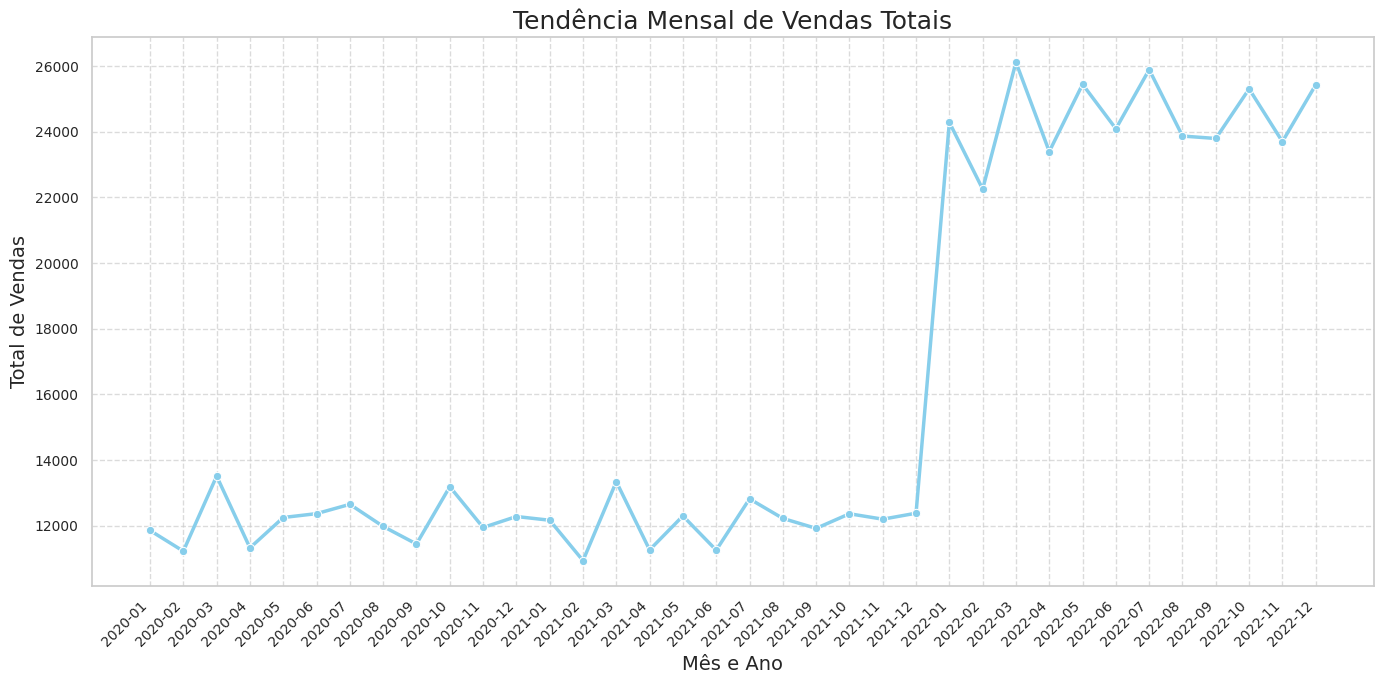


Total de Vendas por Mês/Ano:
ano_mes
2020-01    11859
2020-02    11229
2020-03    13515
2020-04    11330
2020-05    12254
2020-06    12372
2020-07    12655
2020-08    11982
2020-09    11447
2020-10    13192
2020-11    11950
2020-12    12284
2021-01    12171
2021-02    10942
2021-03    13346
2021-04    11268
2021-05    12302
2021-06    11260
2021-07    12822
2021-08    12227
2021-09    11923
2021-10    12368
2021-11    12203
2021-12    12385
2022-01    24286
2022-02    22254
2022-03    26116
2022-04    23397
2022-05    25445
2022-06    24091
2022-07    25892
2022-08    23869
2022-09    23795
2022-10    25305
2022-11    23699
2022-12    25429
Name: preco, dtype: int64


In [12]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=vendas_mensais.index, y=vendas_mensais.values, marker='o', color='skyblue', linewidth=2.5)
plt.title('Tendência Mensal de Vendas Totais', fontsize=18)
plt.xlabel('Mês e Ano', fontsize=14)
plt.ylabel('Total de Vendas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rótulos na diagonal para evitar sobreposição
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y') # Remove notação científica no eixo Y
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTotal de Vendas por Mês/Ano:")
print(vendas_mensais)

###Criação de gráfico do 3 insight para ver o total de vendas por região

/tmp/ipython-input-14-1940676286.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_regiao.index, y=vendas_por_regiao.values, palette='viridis')


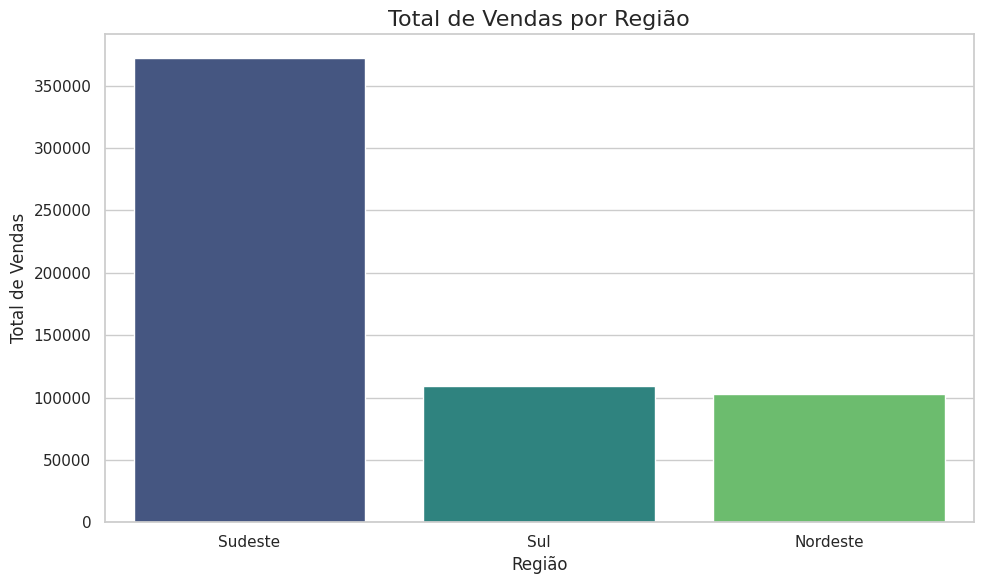


**Dados Detalhados de Vendas por Região:**
regiao
Sudeste     372517
Sul         109185
Nordeste    103162
Name: preco, dtype: int64


In [14]:
# Agrupando os dados pela coluna 'regiao' e somando o 'preco' para obter o total de vendas por região
vendas_por_regiao = data.groupby('regiao')['preco'].sum().sort_values(ascending=False)
# Agrupando os dados pela coluna 'regiao' e somando o 'preco' para obter o total de vendas por região
vendas_por_regiao = data.groupby('regiao')['preco'].sum().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_regiao.index, y=vendas_por_regiao.values, palette='viridis')

# Adicionando título e rótulos aos eixos
plt.title('Total de Vendas por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)

# Melhorando a legibilidade do eixo Y (removendo notação científica se houver)
plt.ticklabel_format(style='plain', axis='y')

# Ajusta o layout para evitar que os rótulos se sobreponham
plt.tight_layout()

# Exibe o gráfico
plt.show()

print("\n**Dados Detalhados de Vendas por Região:**")
print(vendas_por_regiao)
